In [35]:
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import cv2
import re 
from IPython.display import Image
import matplotlib.pyplot as plt
import imutils

plt.rcParams['figure.figsize'] = (5, 10)

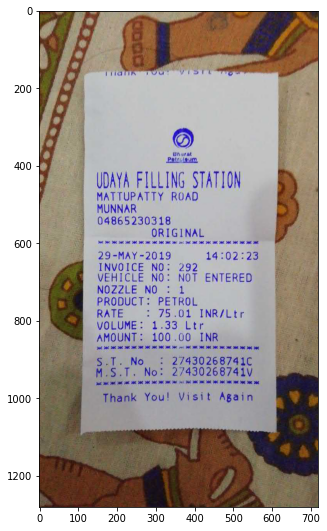

In [37]:
orig = cv2.imread("images/0a0ebd53.jpeg")
plt.imshow(img[:,:,::-1])

In [58]:
image = orig.copy()
def opencv_resize(image, ratio):
    image = imutils.resize(image, width=500)
    return plt.imshow(image[:, :, ::-1])

In [59]:
ratio = orig.shape[1] / float(image.shape[1])

In [60]:
orig.shape, image.shape

((1280, 720, 3), (1280, 720, 3))

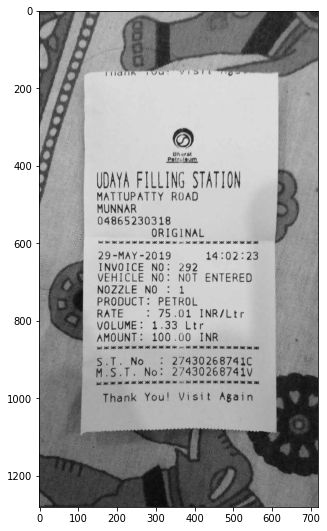

In [62]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

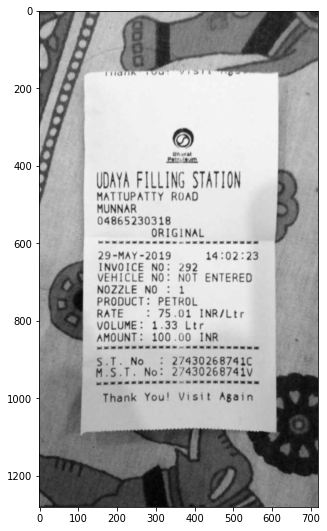

In [69]:
blurred = cv2.GaussianBlur(gray, (5,5,), 0)
plt.imshow(blurred, cmap='gray')

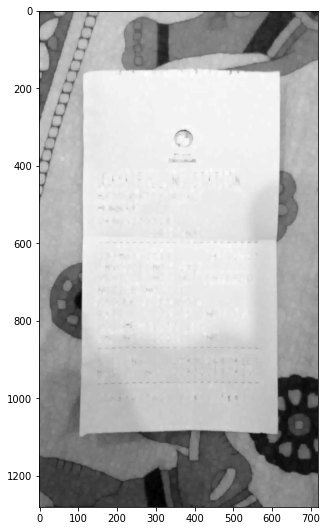

In [70]:
# detect white region

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dialated = cv2.dilate(blurred, rectKernel)
plt.imshow(dialated, cmap='gray')

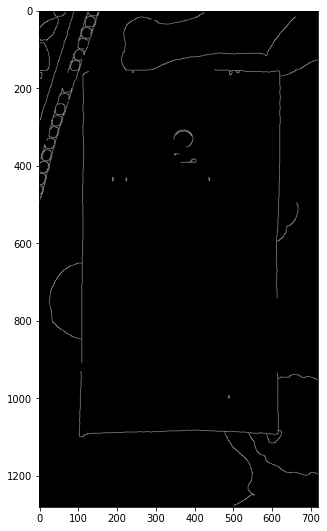

In [71]:
edged = cv2.Canny(dialated, 75, 200)
plt.imshow(edged, cmap='gray')

In [51]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

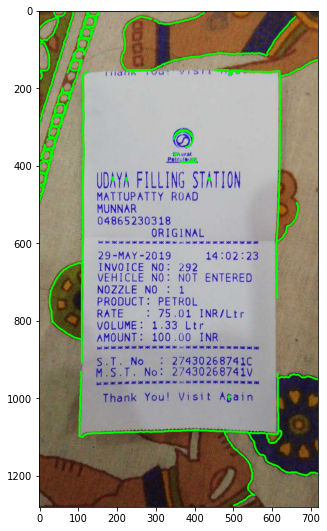

In [72]:
# Detect all countours in Canny Edged image
countour, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_with_countour = cv2.drawContours(image.copy(), countour, -1, (0, 255, 0), 3)
plt.imshow(img_with_countour[:,:,::-1])